
<h1 align="center"> Statistics and Financial Data Analysis
<h1 align="center"> Examples LASSO


In [47]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import scipy as sp
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [48]:
np.random.seed(0) 

n = 50 # number of observations
p = 30 # dimensions of input

x = np.zeros(n*p)

x = np.random.normal(0,1,n*p)
x = np.reshape(x,(n,p))

X = x
X.shape

(50, 30)

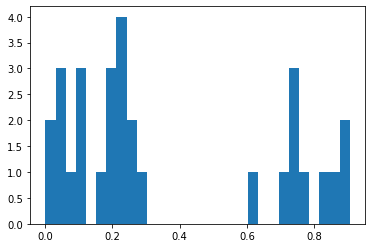

In [49]:
b1 = np.random.uniform(0,0.3,20)
b2 = np.random.uniform(0.5,1,10)

betas = np.concatenate((b2,b1))
plt.hist(betas,bins = 30);

In [50]:
mu = np.zeros(n)

for i in range(n):
        mu[i] = np.dot(betas,X[i])

In [51]:
np.random.seed(1) 
simN = 100

error = np.zeros(simN)
fit_y = np.zeros(simN*n)
fit_y = np.reshape(fit_y,(simN,n))

# For same data points x_i, see different observations of y_i
for j in range(simN):
    y = np.zeros(n) 
    epsilon = np.zeros(n)
    epsilon2 = np.zeros(n)
    yReal = np.zeros(n) 
    
    for i in range(n):
        epsilon[i] = np.random.normal(0,1) 
        y[i] = mu[i]+ epsilon[i]
        epsilon2[i] = np.random.normal(0,1) 
        yReal[i] = mu[i] +epsilon2[i]
    
    linModel = sm.OLS(y,X)
    res = linModel.fit()   
    ypred = res.fittedvalues
    yres  = res.resid
    resSqr = yres**2 

    error[j]= ((ypred-yReal)**2).mean()
    fit_y[j] = ypred 
    
predErr = error.mean()
temp = np.mean(fit_y, axis = 0) 
biasEst = np.sum((temp-mu)**2)/n
temp2 = np.var(fit_y, axis = 0) 
varEst = temp2.mean()

# average over all simulations 100 the coefficient betas*x
# this will return a vector of n= 10 averages, which we take away the true fitted value


print(predErr, biasEst, varEst)
print(1+biasEst+varEst)

1.6290931423445065 0.004553688435484351 0.6137848625949448
1.6183385510304293


In [52]:
np.random.seed(1) 
simN = 100


error = np.zeros(simN)
fit_y = np.zeros(simN*n)
fit_y = np.reshape(fit_y,(simN,n))
print(fit_y.shape)


# For same data points, see different observations of y_i
X = x
for j in range(simN):
    y = np.zeros(n) 
    epsilon = np.zeros(n)
    epsilon2 = np.zeros(n)
    yReal = np.zeros(n) 
    
    for i in range(n):
        epsilon[i] = np.random.normal(0,1) 
        y[i] = mu[i]+ epsilon[i]
        epsilon2[i] = np.random.normal(0,1) 
        yReal[i] = mu[i] +epsilon2[i]
    
    linreg = LinearRegression(fit_intercept = False, normalize=True)
    linreg.fit(X,y)
    ypred = linreg.predict(X)
    
    error[j]= ((ypred-yReal)**2).mean()
    fit_y[j] = ypred 

predErr = error.mean()
# average over all simulations 100 the coefficient betas*x
# this will return a vector of n= 10 averages, which we take away the true fitted value
temp = np.mean(fit_y, axis = 0) 
biasEst = np.sum((temp-mu)**2)/n

temp2 = np.var(fit_y, axis = 0) 
varEst = temp2.mean()
predErrOLS = predErr

print(predErr, biasEst, varEst, 30/50)
print(1+biasEst+varEst)

(100, 50)
1.629093142344507 0.004553688435484595 0.6137848625949448 0.6
1.6183385510304293


In [53]:
def simLassoDiffAlpha(alpha):
    
    numAlpha = len(alpha)

    predErr = np.zeros(numAlpha)
    biasEst = np.zeros(numAlpha)
    varEst = np.zeros(numAlpha)
    
    for z in range(numAlpha):

        np.random.seed(1) 
        simN = 100

        error = np.zeros(simN)
        fit_y = np.zeros(simN*n)
        fit_y = np.reshape(fit_y,(simN,n))

        # For same data points, see different observations of y_i
        X = x
        for j in range(simN):
            y = np.zeros(n) 
            epsilon = np.zeros(n)
            epsilon2 = np.zeros(n)
            yReal = np.zeros(n) 

            for i in range(n):
                epsilon[i] = np.random.normal(0,1) 
                y[i] = mu[i]+ epsilon[i]
                epsilon2[i] = np.random.normal(0,1) 
                yReal[i] = mu[i] +epsilon2[i]

            ridreg = Lasso(alpha = alpha[z],fit_intercept = False, normalize=True)
            ridreg.fit(X,y)
            ypred = ridreg.predict(X)

            error[j]= ((ypred-yReal)**2).mean()
            fit_y[j] = ypred 
            
        predErr[z] = error.mean()
        
        temp = np.mean(fit_y, axis = 0) 
        biasEst[z] = np.sum((temp-mu)**2)/n

        temp2 = np.var(fit_y, axis = 0) 
        varEst[z] = temp2.mean()

    
    return predErr, biasEst, varEst
    

In [54]:
X[0].shape

(30,)

In [55]:
alphaSimN = 25

alpha = np.linspace(0,0.2,alphaSimN)

predErr,biasEst,varEst = simLassoDiffAlpha(alpha)
test = 1+biasEst + varEst

biasEst

array([0.01042947, 0.01454395, 0.02226707, 0.0331293 , 0.0464376 ,
       0.06229623, 0.08028738, 0.09998131, 0.12111331, 0.14385143,
       0.16813124, 0.19383928, 0.22099457, 0.24966659, 0.27957399,
       0.31114106, 0.34435375, 0.37900561, 0.41508025, 0.45262269,
       0.49174477, 0.53236166, 0.57447433, 0.61809405, 0.66298757])

In [56]:
varEst

array([0.61174754, 0.5715017 , 0.53805632, 0.50959155, 0.4848114 ,
       0.4633197 , 0.44443164, 0.42791405, 0.41350813, 0.40073374,
       0.38916656, 0.37884273, 0.36957036, 0.36108993, 0.35333707,
       0.34631237, 0.33981949, 0.33369371, 0.32783228, 0.32229239,
       0.3171278 , 0.31225009, 0.30765094, 0.3032931 , 0.29908875])

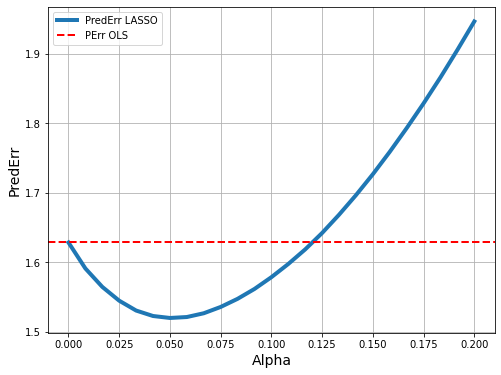

In [57]:
plt.figure(1, figsize=(8,6))
plt.plot(alpha,predErr, linewidth = 4,label = 'PredErr LASSO')
plt.axhline(y=predErrOLS, color='r', linewidth = 2,linestyle='--', label = 'PErr OLS')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('PredErr', fontsize = 14)
plt.legend()
plt.grid()
plt.savefig("PredError_Lasso")

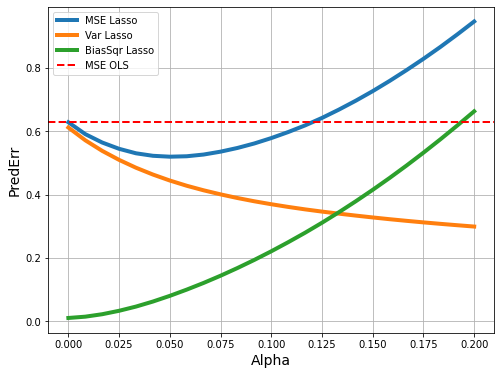

In [58]:
mse = predErr -1 
plt.figure(1, figsize=(8,6))
plt.plot(alpha,mse, linewidth = 4,label = 'MSE Lasso')
plt.plot(alpha,varEst, linewidth = 4,label = 'Var Lasso')
plt.plot(alpha,biasEst, linewidth = 4,label = 'BiasSqr Lasso')
plt.axhline(y=predErrOLS-1, color='r', linewidth = 2,linestyle='--', label = 'MSE OLS')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('PredErr', fontsize = 14)
plt.legend()
plt.grid()
plt.savefig("PredErr_BiasVar_decomp")

In [122]:
simN = 1

def simLassoDiffAlpha2(alpha):
    
    numAlpha = len(alpha)

    predErr = np.zeros(numAlpha)
    biasEst = np.zeros(numAlpha)
    varEst = np.zeros(numAlpha)
    coeff = []
    
    for z in range(numAlpha):

        np.random.seed(1) 
        simN = 100

        error = np.zeros(simN)
        fit_y = np.zeros(simN*n)
        fit_y = np.reshape(fit_y,(simN,n))

        # For same data points, see different observations of y_i
        X = x
        for j in range(simN):
            y = np.zeros(n) 
            epsilon = np.zeros(n)
            epsilon2 = np.zeros(n)
            yReal = np.zeros(n) 

            for i in range(n):
                epsilon[i] = np.random.normal(0,1) 
                y[i] = mu[i]+ epsilon[i]
                epsilon2[i] = np.random.normal(0,1) 
                yReal[i] = mu[i] +epsilon2[i]

            ridreg = Lasso(alpha = alpha[z],fit_intercept = False, normalize=True)
            ridreg.fit(X,y)
            ypred = ridreg.predict(X)
            temp = ridreg.coef_

            error[j]= ((ypred-yReal)**2).mean()
            fit_y[j] = ypred 
            
        predErr[z] = error.mean()
        coeff.append(temp)
        
        temp = np.mean(fit_y, axis = 0) 
        biasEst[z] = np.sum((temp-mu)**2)/n

        temp2 = np.var(fit_y, axis = 0) 
        varEst[z] = temp2.mean()

    
    return predErr, biasEst, varEst, coeff
    

In [123]:
alphaSimN = 10

alpha = np.linspace(0,.25,alphaSimN)

predErr,biasEst,varEst, coeff = simLassoDiffAlpha2(alpha)


In [124]:
coeff[0][0]

1.0447740487209471

In [125]:
y = np.zeros(alphaSimN*p)
y = np.reshape(y,(p,alphaSimN))

for i in range(p):
    for j in range(alphaSimN):
        y[i][j] = coeff[j][i]

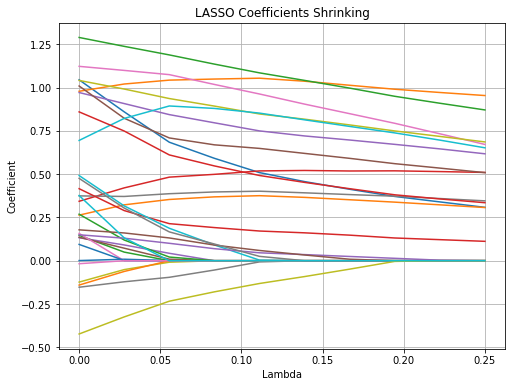

In [126]:
plt.figure(1, figsize=(8,6))

for j in range(p):
    plt.plot(alpha,y[j])

plt.grid()
plt.title("LASSO Coefficients Shrinking")
plt.ylabel('Coefficient')
plt.xlabel('Lambda')
plt.savefig("LASSO")

In [127]:
coeff[6]

array([ 0.41260915,  1.0133144 ,  0.99683078,  0.51820873,  0.69708399,
        0.59121769,  0.84923329,  0.38200024,  0.78429962,  0.77563689,
        0.        ,  0.352085  , -0.        ,  0.14762445,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.41589597,  0.02451274,
        0.00863183,  0.        ,  0.        , -0.04868428, -0.        ])

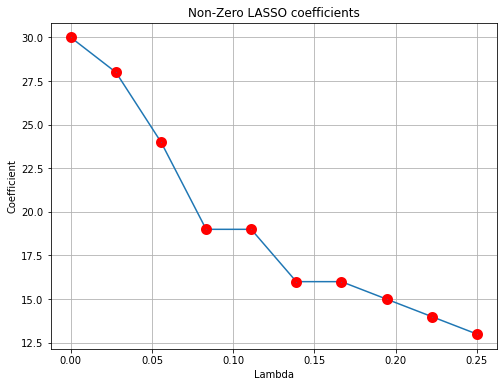

In [128]:
plt.figure(1, figsize=(8,6))
pp = np.zeros(alphaSimN)

for j in range(alphaSimN):
    pp[j] = np.count_nonzero(coeff[j])
    
plt.plot(alpha,pp,marker = 'o',markeredgecolor='r',markeredgewidth=5)

plt.grid()
plt.title("Non-Zero LASSO coefficients")
plt.ylabel('Coefficient')
plt.xlabel('Lambda')
plt.savefig("LASSO_coeff2")

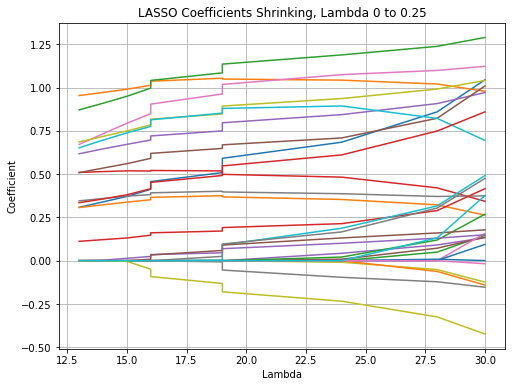

In [129]:
plt.figure(1, figsize=(8,6))
pp = np.zeros(alphaSimN)

for j in range(alphaSimN):
    pp[j] = np.count_nonzero(coeff[j])
    

for j in range(p):
    plt.plot(pp,y[j])

plt.grid()
plt.title("LASSO Coefficients Shrinking, Lambda 0 to 0.25")
plt.ylabel('Coefficient')
plt.xlabel('Lambda')
plt.savefig("LASSO")

In [130]:
alphaSimN = 10

alpha = np.linspace(0,2,alphaSimN)

predErr,biasEst,varEst, coeff = simLassoDiffAlpha2(alpha)



In [131]:
y = np.zeros(alphaSimN*p)
y = np.reshape(y,(p,alphaSimN))

for i in range(p):
    for j in range(alphaSimN):
        y[i][j] = coeff[j][i]

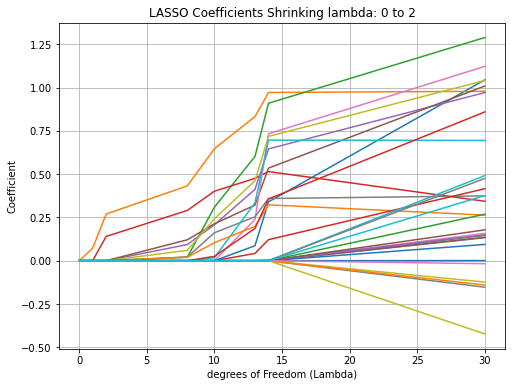

In [132]:
plt.figure(1, figsize=(8,6))


for j in range(alphaSimN):
    pp[j] = np.count_nonzero(coeff[j])
    
for j in range(p):
    plt.plot(pp,y[j])

plt.grid()
plt.title("LASSO Coefficients Shrinking lambda: 0 to 2")
plt.ylabel('Coefficient')
plt.xlabel('degrees of Freedom (Lambda)')
plt.savefig("LASSO_degreesFreedom")